In [1]:
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

In [2]:
import pandas as pd
import numpy as np

np.random.seed(1)
num=10000

dists = {cat: pd.DataFrame(dict(x=np.random.normal(x,s,num),
                                y=np.random.normal(y,s,num),
                                val=val,cat=cat))
         for x,y,s,val,cat in 
         [(2,2,0.01,10,"d1"), (2,-2,0.1,20,"d2"), (-2,-2,0.5,30,"d3"), (-2,2,1.0,40,"d4"), (0,0,3,50,"d5")]}

df = pd.concat(dists,ignore_index=True)
df["cat"]=df["cat"].astype("category")
df.tail()

,cat,val,x,y
49995,d5,50,-1.397579,0.610189
49996,d5,50,-2.649610,3.080821
49997,d5,50,1.933360,0.243676
49998,d5,50,4.306374,1.032139
49999,d5,50,-0.493567,-2.242669


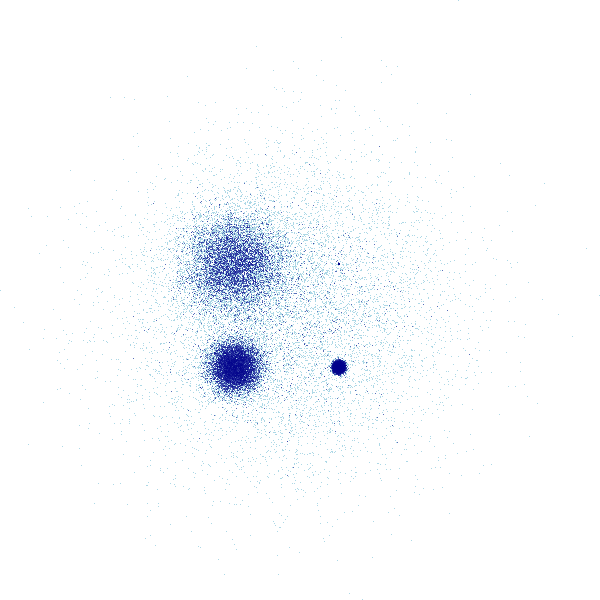

In [3]:
import datashader as ds
import datashader.transfer_functions as tf

tf.shade(ds.Canvas().points(df,'x','y'))

In [4]:
canvas = ds.Canvas(plot_width=500, plot_height=500, x_range=(-4,4), y_range=(-4,4))
agg = canvas.points(df, 'x', 'y', agg=ds.count())

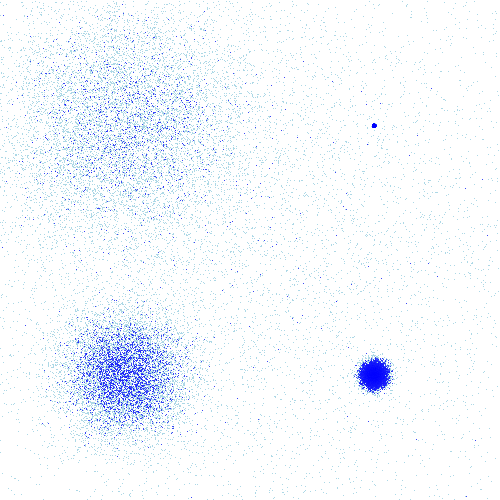

In [5]:
tf.shade(agg, cmap=['lightblue','blue'])

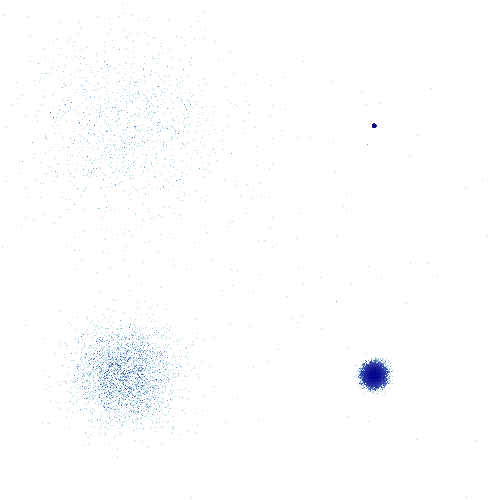

In [6]:
tf.shade(agg.where(agg>=np.percentile(agg,99)))

/home/areshytko/anaconda3/lib/python3.5/site-packages/datashader/transfer_functions.py:258: RuntimeWarning: invalid value encountered in true_divide
  r = (data.dot(rs)/total).astype(np.uint8)
/home/areshytko/anaconda3/lib/python3.5/site-packages/datashader/transfer_functions.py:259: RuntimeWarning: invalid value encountered in true_divide
  g = (data.dot(gs)/total).astype(np.uint8)
/home/areshytko/anaconda3/lib/python3.5/site-packages/datashader/transfer_functions.py:260: RuntimeWarning: invalid value encountered in true_divide
  b = (data.dot(bs)/total).astype(np.uint8)


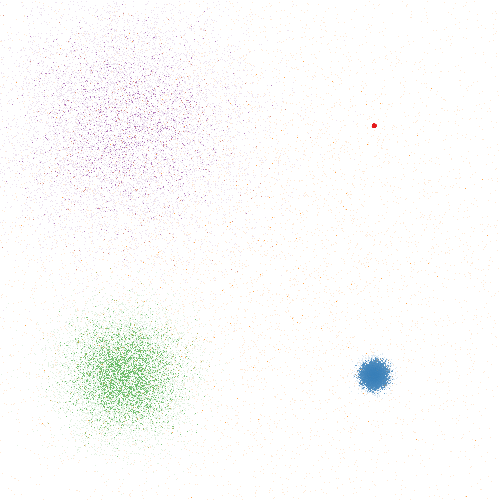

In [7]:
aggc = canvas.points(df, 'x', 'y', agg=ds.count_cat('cat'))
tf.shade(aggc)

In [8]:
import bokeh.plotting as bp
from datashader.bokeh_ext import InteractiveImage

p = bp.figure(tools='pan,wheel_zoom,reset', x_range=(-5,5), y_range=(-5,5))

def image_callback(x_range, y_range, w, h):
    cvs = ds.Canvas(plot_width=w, plot_height=h, x_range=x_range, y_range=y_range)
    agg = cvs.points(df, 'x', 'y', ds.count_cat('cat'))
    img = tf.shade(agg)
    return tf.dynspread(img, threshold=0.25)

InteractiveImage(p, image_callback)

/home/areshytko/anaconda3/lib/python3.5/site-packages/datashader/transfer_functions.py:258: RuntimeWarning: invalid value encountered in true_divide
  r = (data.dot(rs)/total).astype(np.uint8)
/home/areshytko/anaconda3/lib/python3.5/site-packages/datashader/transfer_functions.py:259: RuntimeWarning: invalid value encountered in true_divide
  g = (data.dot(gs)/total).astype(np.uint8)
/home/areshytko/anaconda3/lib/python3.5/site-packages/datashader/transfer_functions.py:260: RuntimeWarning: invalid value encountered in true_divide
  b = (data.dot(bs)/total).astype(np.uint8)


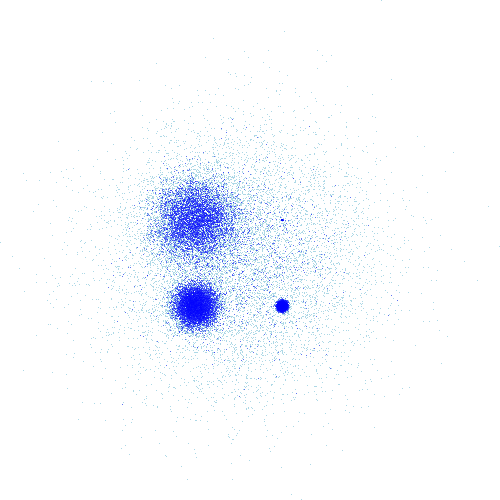

In [3]:
from welllogs.plt.chart import DatashaderScatterplot, DatashaderInteractiveScatterplot

DatashaderScatterplot(df, 'x', 'y', width=500, height=500)()

In [4]:
#InteractiveImage(*DatashaderInteractiveScatterplot(df, 'x', 'y', color='cat'))
DatashaderInteractiveScatterplot(df, 'x', 'y', color='cat')()

/home/areshytko/anaconda3/lib/python3.5/site-packages/datashader/transfer_functions.py:258: RuntimeWarning: invalid value encountered in true_divide
  r = (data.dot(rs)/total).astype(np.uint8)
/home/areshytko/anaconda3/lib/python3.5/site-packages/datashader/transfer_functions.py:259: RuntimeWarning: invalid value encountered in true_divide
  g = (data.dot(gs)/total).astype(np.uint8)
/home/areshytko/anaconda3/lib/python3.5/site-packages/datashader/transfer_functions.py:260: RuntimeWarning: invalid value encountered in true_divide
  b = (data.dot(bs)/total).astype(np.uint8)
